<center><h1><b>Quora Insincere Questions Classification Using Neural Networks and Deep Learning Models</b></h1></center>


Outline:
1. Dowload data from Kaggle to google Colab

2. Prepare the data for Modeling using the TF-IDF Technique

3. Train a deep learning model using `PyTorch` package

## Download Data from Kaggle

In [181]:
!ls

data  kaggle.json  sample_data


In [182]:
!pwd

/content


In [183]:
import os

In [184]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [185]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [186]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [187]:
import pandas as pd

In [188]:
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sample_fname)

In [189]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [190]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [191]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [192]:
raw_df.sample(10)

,qid,question_text,target
123801,183c6c0bac9715ca18ac,"What are the three things people should do, to...",0
4467,00e054ed325b88931686,What are some tips for buying the right car?,0
988843,c1bacb765f9b3e3feb76,Will Quora implement revenue sharing with cont...,0
194824,261504649c616333be8b,What would happen if a governor uses the natio...,0
1065250,d0bf5db1fb6ea6cc6f1b,What is the value of Universal gravitation Con...,0
406545,4fa914b62669b603ea56,What are short stay hotels in Bangalore?,0
1224725,f006ca76f115ce078824,How can I get views on my tech blogs?,0
672717,83bfa215401d8979de2f,"What is the plot of the novel ""Tender Is the N...",0
125126,187df9f8cb442565d16b,Can we use accelerometer for VR?,0
855532,a79fec31c72da8f8ce90,What is the greatest sacrifice you have ever m...,0


## Data Exploration

In [193]:
SAMPLE_SIZE = 100_000
sample_df = raw_df.sample(SAMPLE_SIZE)

<ipython-input-194-7894999f8743>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=raw_df, palette=colors)


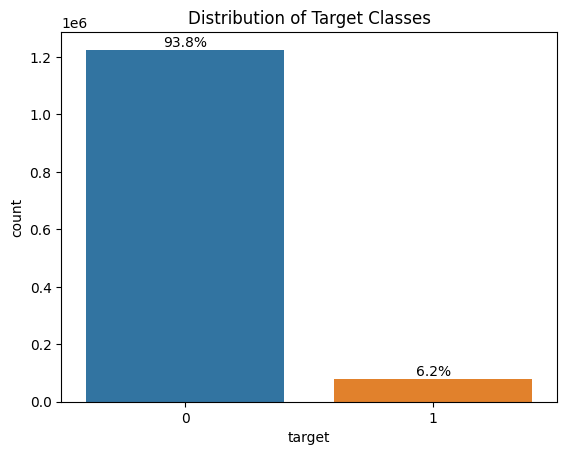

In [194]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot with custom colors
colors = ['#1f77b4', '#ff7f0e']
ax = sns.countplot(x='target', data=raw_df, palette=colors)

# Title
plt.title('Distribution of Target Classes')

# Calculate percentages and annotate bars
total = len(raw_df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


In [195]:
# Add character count column if not already added
raw_df['char_count'] = raw_df['question_text'].apply(len)

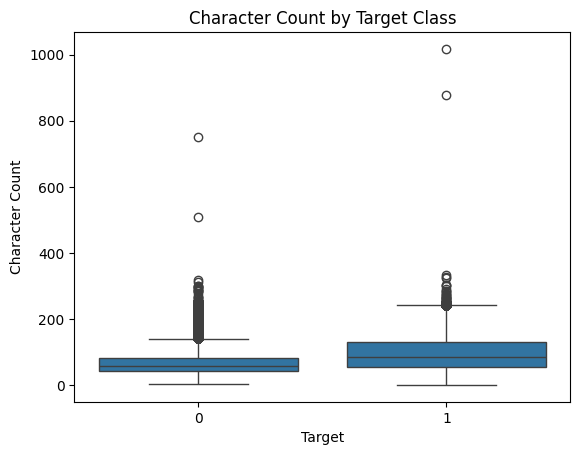

In [196]:
# Box plot of character count by target class
sns.boxplot(x='target', y='char_count', data=raw_df)
plt.title('Character Count by Target Class')
plt.xlabel('Target')
plt.ylabel('Character Count')
plt.show()


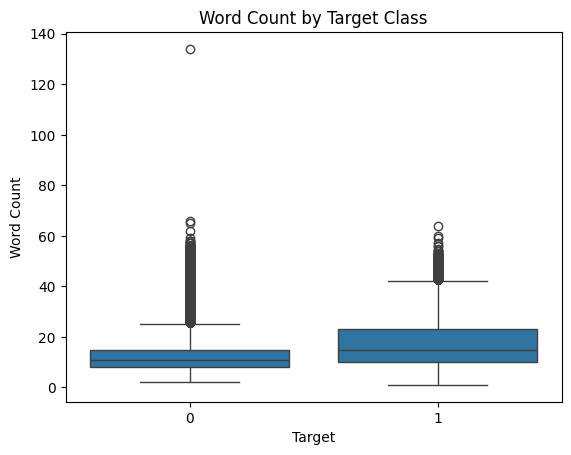

In [197]:
# Add word count column
raw_df['word_count'] = raw_df['question_text'].apply(lambda x: len(x.split()))

# Box plot of word count
sns.boxplot(x='target', y='word_count', data=raw_df)
plt.title('Word Count by Target Class')
plt.xlabel('Target')
plt.ylabel('Word Count')
plt.show()


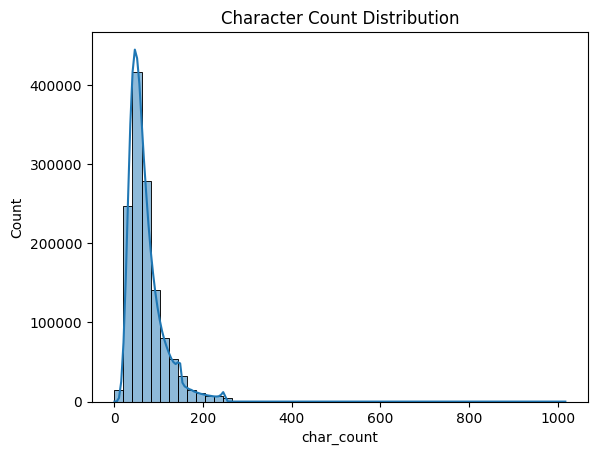

In [198]:
raw_df.char_count = raw_df['question_text'].apply(len)
raw_df.word_count = raw_df['question_text'].apply(lambda x: len(x.split()))

# Plot distributions
sns.histplot(raw_df.char_count, bins=50, kde=True)
plt.title('Character Count Distribution')
plt.show()


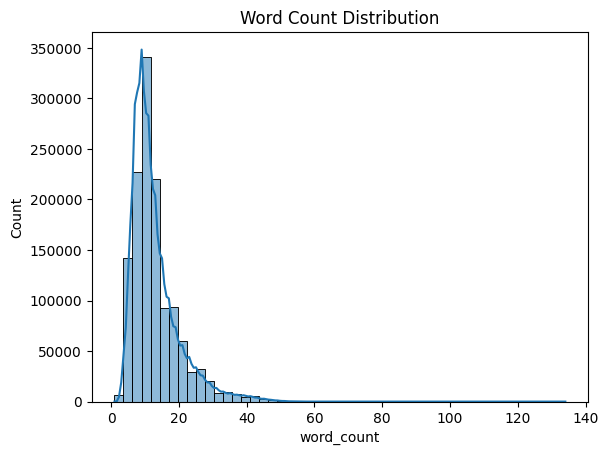

In [199]:
sns.histplot(raw_df.word_count, bins=50, kde=True)
plt.title('Word Count Distribution')
plt.show()

In [200]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_n_words(corpus, n=None):
    words = ' '.join(corpus).lower().split()
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

top_words = get_top_n_words(sample_df['question_text'], n=20)
print(top_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('would', 4857), ('best', 4736), ('get', 4706), ('people', 3726), ('like', 3230), ('good', 2674), ('one', 2355), ('make', 2133), ('think', 1971), ('many', 1844), ('much', 1716), ('someone', 1575), ('use', 1566), ('want', 1436), ('way', 1408), ('know', 1393), ('find', 1367), ('ever', 1338), ('take', 1337), ('without', 1302)]


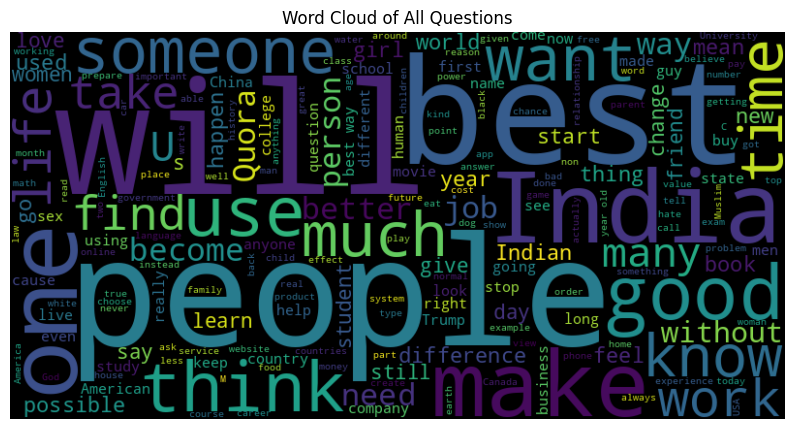

In [201]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(sample_df['question_text']))
plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Questions")
plt.show()


In [202]:
raw_df.question_mark = sample_df['question_text'].apply(lambda x: '?' in x)
raw_df

<ipython-input-202-d02c7e5e2bf1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  raw_df.question_mark = sample_df['question_text'].apply(lambda x: '?' in x)


,qid,question_text,target,char_count,word_count
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15
...,...,...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0,93,17
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0,91,19
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0,25,4
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0,71,13


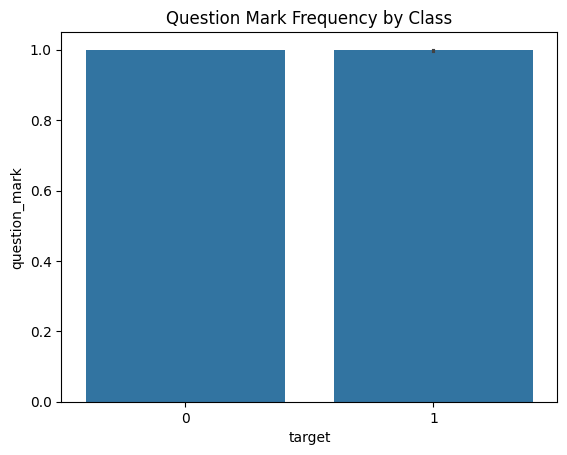

In [203]:
# Presence of question mark
raw_df['question_mark'] = raw_df['question_text'].apply(lambda x: '?' in x)

sns.barplot(x='target', y='question_mark', data=raw_df)
plt.title('Question Mark Frequency by Class')
plt.show()


In [204]:
sample_df

,qid,question_text,target
72082,0e21887f2722bfd1ca92,Is Hong Kong or Shenzhen a good city for start...,0
189486,250d3cc4b2dd26c201d7,What is the mass when you only have volume?,0
49369,09a9e5251c599047cfc3,What is like to be with a 10 years younger man...,0
90538,11bc7df13d7feef6fe15,Why are indians doing propaganda against Pakis...,1
816087,9fe8c26f3bbaa43ec0b4,"""This had to have been made for me"", is this s...",0
...,...,...,...
209510,28f8911084a6a8dda9b6,What would the Russians have done to Hitler if...,0
858123,a82066442358540b1c51,Who’s the creepiest: the one who does the cree...,0
550146,6bc9bce9cb8e24013afa,What makes something child-friendly?,0
36050,070dd6c930baaed34aaa,What does mean by referencing a reference with...,0


In [205]:
sample_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93696
1,0.06304


## Prepare the Data for Training
- Convert text to TF-IDF Vectors

- Convert Vectors to PyyTorch tensors

- Create PyTorch Data Loaders

### Convert text to TF-IDF

In [206]:
import nltk

In [207]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [208]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [209]:
stemmer = SnowballStemmer(language='english')

In [210]:
stemmer.stem('going')

'go'

In [211]:
def tokenize(text):
  return[stemmer.stem(token) for token in word_tokenize(text) ]

In [212]:
tokenize('This is a set of butterfries unexpectedily!')

['this', 'is', 'a', 'set', 'of', 'butterfri', 'unexpectedili', '!']

In [213]:
word_tokenize('This is something very new () in the field of data analysis.')

['This',
 'is',
 'something',
 'very',
 'new',
 '(',
 ')',
 'in',
 'the',
 'field',
 'of',
 'data',
 'analysis',
 '.']

In [214]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [215]:
english_stopwords = stopwords.words('english')

In [216]:
','.join(english_stopwords)

"a,about,above,after,again,against,ain,all,am,an,and,any,are,aren,aren't,as,at,be,because,been,before,being,below,between,both,but,by,can,couldn,couldn't,d,did,didn,didn't,do,does,doesn,doesn't,doing,don,don't,down,during,each,few,for,from,further,had,hadn,hadn't,has,hasn,hasn't,have,haven,haven't,having,he,he'd,he'll,her,here,hers,herself,he's,him,himself,his,how,i,i'd,if,i'll,i'm,in,into,is,isn,isn't,it,it'd,it'll,it's,its,itself,i've,just,ll,m,ma,me,mightn,mightn't,more,most,mustn,mustn't,my,myself,needn,needn't,no,nor,not,now,o,of,off,on,once,only,or,other,our,ours,ourselves,out,over,own,re,s,same,shan,shan't,she,she'd,she'll,she's,should,shouldn,shouldn't,should've,so,some,such,t,than,that,that'll,the,their,theirs,them,themselves,then,there,these,they,they'd,they'll,they're,they've,this,those,through,to,too,under,until,up,ve,very,was,wasn,wasn't,we,we'd,we'll,we're,were,weren,weren't,we've,what,when,where,which,while,who,whom,why,will,with,won,won't,wouldn,wouldn't,y,you,you'd,you

In [217]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [218]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=english_stopwords, max_features=1000)

In [219]:
sample_df.question_text

,question_text
72082,Is Hong Kong or Shenzhen a good city for start...
189486,What is the mass when you only have volume?
49369,What is like to be with a 10 years younger man...
90538,Why are indians doing propaganda against Pakis...
816087,"""This had to have been made for me"", is this s..."
...,...
209510,What would the Russians have done to Hitler if...
858123,Who’s the creepiest: the one who does the cree...
550146,What makes something child-friendly?
36050,What does mean by referencing a reference with...


In [220]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 25 s, sys: 75.4 ms, total: 25.1 s
Wall time: 27.1 s


TfidfVectorizer(max_features=1000,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7fa95415a480>)

In [221]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'acid', 'act', 'action', 'activ', 'actual',
       'ad', 'add', 'admiss', 'adult', 'advanc', 'advantag', 'advic',
       'affect', 'african', 'age', 'ago', 'air', 'allow', 'almost',
       'alon', 'alreadi', 'also', 'altern', 'alway', 'amazon', 'america',
       'american', 'among', 'amount', 'analysi', 'ancient', 'android',
       'ani', 'anim', 'anoth', 'answer', 'anxieti', 'anyon', 'anyth',
       'apart', 'app', 'appear', 'appl', 'appli', 'applic', 'arab',
       'area', 'armi', 'around', 'art', 'asian', 'ask', 'associ',
       'atheist', 'attack', 'attend', 'attract'], dtype=object)

## Transform the questionsin to Vectors

In [222]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 25.3 s, sys: 68.6 ms, total: 25.4 s
Wall time: 25.6 s


In [223]:
inputs.shape

(100000, 1000)

In [ ]:
test_inputs

In [224]:
inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 549027 stored elements and shape (100000, 1000)>

In [225]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 38s, sys: 262 ms, total: 1min 39s
Wall time: 1min 50s


In [226]:
test_inputs.shape

(375806, 1000)

## Split the Training and Validation Sets

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
targets = sample_df.target

In [229]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3)

In [230]:
train_inputs.shape

(70000, 1000)

In [231]:
val_inputs.shape

(30000, 1000)

In [232]:
train_targets

,target
974907,0
1037168,0
185,0
435277,0
1143568,0
...,...
958033,0
754141,0
960348,0
29742,0


In [233]:
val_targets

,target
208530,0
1155342,0
725757,0
126065,0
112874,1
...,...
455635,0
478081,0
211992,0
290418,0


In [234]:
len(train_targets)

70000

## Convert to PyTorch Tensors

In [235]:
import torch

In [236]:
#convert from a sparse matrix to numpy array using the command .toarray() and converting to float
train_input_tensors = torch.tensor(train_inputs.toarray()).float()
test_inputs_tensors = torch.tensor(test_inputs.toarray()).float()
val_input_tensors = torch.tensor(val_inputs.toarray()).float()

In [237]:
train_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [238]:
train_input_tensors.shape

torch.Size([70000, 1000])

In [239]:
val_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [240]:
val_input_tensors.shape

torch.Size([30000, 1000])

In [241]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [242]:
# convert from pandas series to numpy array using the command .values
train_target_tensors = torch.tensor(train_targets.values).float()
val_target_tensors = torch.tensor(val_targets.values).float()

In [243]:
test_inputs_tensors = torch.tensor(test_inputs.toarray()).float()

In [244]:
test_inputs_tensors.shape

torch.Size([375806, 1000])

In [245]:
test_inputs.shape

(375806, 1000)

## Create PyTorch Data Loaders

In [246]:
from torch.utils.data import TensorDataset, DataLoader

In [247]:
train_ds = TensorDataset(train_input_tensors, train_target_tensors)
val_ds = TensorDataset(val_input_tensors, val_target_tensors)
test_ds = TensorDataset(test_inputs_tensors)

In [248]:
test_inputs.shape

(375806, 1000)

In [249]:
train_input_tensors.shape

torch.Size([70000, 1000])

In [250]:
train_ds[:10]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]))

In [251]:
BATCH_SIZE = 128

In [252]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE)
sub_dl = DataLoader(sub_df, batch_size=BATCH_SIZE )

In [253]:
len(test_dl.dataset)


375806

In [254]:
len(test_ds)

375806

In [255]:
len(sub_df)

375806

In [256]:
len(sub_dl)

2936

In [257]:
for batch in train_dl:
  batch_inputs = batch[0]
  batch_targets = batch[1]
  print('batch_inputs.shape', batch_inputs.shape)
  print('batch_targets.shape', batch_targets.shape)
  break

batch_inputs.shape torch.Size([128, 1000])
batch_targets.shape torch.Size([128])


In [258]:
len(train_dl)

547

In [259]:
# about 547 batches in the data loader

## Train Deep Learning Model

In [260]:
import torch.nn as nn
import torch.nn.functional as F

In [261]:
from sklearn.metrics import accuracy_score, f1_score

In [262]:
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1000, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128, 1)
    pass
  def forward(self, inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out)
    return out


In [263]:
model = QuoraNet()

In [264]:
for batch in train_dl:
  bi, bt = batch
  print('inputs.shape', bi.shape)
  print('targets.shape', bt.shape)

  bo = model(bi)
  print('bo.shape', bo.shape)

  # convert outputs to probabilities
  probs = torch.sigmoid(bo[:,0])
  print('probs', probs[:10])

  #convert probs to predictions
  preds = (probs > 0.5).int()
  print('preds', preds[:10])
  print('batch_targets', bt[:10])

   # check the metrics
  print('Accuracy score', accuracy_score(bt, preds))
  print('F1 score', f1_score(bt, preds))

  # Loss
  print('Loss', F.binary_cross_entropy(preds.float(), bt))

  break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
bo.shape torch.Size([128, 1])
probs tensor([0.4956, 0.4957, 0.4957, 0.4954, 0.4955, 0.4959, 0.4955, 0.4956, 0.4957,
        0.4951], grad_fn=<SliceBackward0>)
preds tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)
batch_targets tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])
Accuracy score 0.9140625
F1 score 0.0
Loss tensor(8.5938)


In [265]:
bi[:10]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [266]:
bi.shape

torch.Size([128, 1000])

In [267]:
bt[:10]

tensor([0., 1., 0., 0., 0., 0., 0., 0., 0., 1.])

In [268]:
bt.shape

torch.Size([128])

In [269]:
bo[:10]

tensor([[-0.0175],
        [-0.0173],
        [-0.0172],
        [-0.0183],
        [-0.0179],
        [-0.0166],
        [-0.0181],
        [-0.0177],
        [-0.0173],
        [-0.0196]], grad_fn=<SliceBackward0>)

In [270]:
bo.shape

torch.Size([128, 1])

In [271]:
# Evaluate model performance
def evaluate(model, dl):
  losses, accs, f1s = [], [], []

  # loop over batches
  for batch in dl:

    # Get inputs and targets
    inputs, targets = batch

    # Get outputs from the model
    outputs = model(inputs)

    # convert to probabilities
    probs = torch.sigmoid(outputs[:,0])

    # compute loss
    loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

    # compute preds
    preds = (probs > 0.5).int()

    # compute accuracy and F1 scores
    acc = accuracy_score(targets, preds)
    f1 = f1_score(targets, preds)

    losses.append(loss)
    accs.append(acc)
    f1s.append(f1)

  return (torch.mean(torch.tensor(losses)).item(),
  torch.mean(torch.tensor(accs)).item(),
  torch.mean(torch.tensor(f1s)).item())


In [272]:
evaluate(model, train_dl)

(13.711091041564941, 0.9371469616889954, 0.0)

In [273]:
evaluate(model, val_dl)

(13.711217880249023, 0.9365358948707581, 0.0)

In [274]:
from operator import le
# Train the model batch by batch
def fit(epochs, lr, model, train_dl, val_dl):
  history = []
  optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)

  for epoch in range(epochs):
    # Training phase of the model
    for batch in train_dl:

      # Get inputs and targets
      inputs, targets = batch

      # Get model outputs
      outputs = model(inputs)

      # Get probabilities
      probs = torch.sigmoid(outputs[:,0])

      # Compute loss
      loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

      # Perform optimization
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Evaluation phase of the model
    loss, acc, f1 = evaluate(model, val_dl)
    print('Epoch: {}, Loss {:.4f}, Accuracy: {:.4f}, F1 Score: {:.4f}'.format(
        epoch+1, loss, acc, f1))
    history.append([loss, acc, f1])
  return history






In [275]:
fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1, Loss 3.1751, Accuracy: 0.9425, F1 Score: 0.3921
Epoch: 2, Loss 3.1138, Accuracy: 0.9450, F1 Score: 0.4020
Epoch: 3, Loss 3.2615, Accuracy: 0.9452, F1 Score: 0.3879
Epoch: 4, Loss 4.0009, Accuracy: 0.9424, F1 Score: 0.4274
Epoch: 5, Loss 5.3784, Accuracy: 0.9403, F1 Score: 0.3859


[[3.175119161605835, 0.9425421357154846, 0.39214521646499634],
 [3.1137540340423584, 0.9449578523635864, 0.40195709466934204],
 [3.2614850997924805, 0.9452127814292908, 0.3878929913043976],
 [4.000936985015869, 0.9424312710762024, 0.42735713720321655],
 [5.378421783447266, 0.9403257966041565, 0.38585856556892395]]

In [276]:
model = QuoraNet()

In [277]:
history = []

In [278]:
history.append(evaluate(model, val_dl))

In [279]:
history

[(14.199381828308105, 0.06346409767866135, 0.11860930919647217)]

In [280]:
history+=fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1, Loss 3.1844, Accuracy: 0.9422, F1 Score: 0.3775
Epoch: 2, Loss 3.2273, Accuracy: 0.9422, F1 Score: 0.4358
Epoch: 3, Loss 3.2326, Accuracy: 0.9427, F1 Score: 0.4257
Epoch: 4, Loss 3.9667, Accuracy: 0.9411, F1 Score: 0.4017
Epoch: 5, Loss 5.3225, Accuracy: 0.9399, F1 Score: 0.3739


In [281]:
history+=fit(10, 0.0001, model, train_dl, val_dl)

Epoch: 1, Loss 6.4625, Accuracy: 0.9387, F1 Score: 0.3998
Epoch: 2, Loss 7.1029, Accuracy: 0.9390, F1 Score: 0.3903
Epoch: 3, Loss 7.5383, Accuracy: 0.9392, F1 Score: 0.3853
Epoch: 4, Loss 7.7652, Accuracy: 0.9390, F1 Score: 0.3839
Epoch: 5, Loss 8.0930, Accuracy: 0.9392, F1 Score: 0.3881
Epoch: 6, Loss 8.2780, Accuracy: 0.9385, F1 Score: 0.4079
Epoch: 7, Loss 8.4059, Accuracy: 0.9380, F1 Score: 0.4059
Epoch: 8, Loss 8.7777, Accuracy: 0.9391, F1 Score: 0.3931
Epoch: 9, Loss 8.9606, Accuracy: 0.9389, F1 Score: 0.3851
Epoch: 10, Loss 9.0523, Accuracy: 0.9383, F1 Score: 0.3931


In [282]:
history

[(14.199381828308105, 0.06346409767866135, 0.11860930919647217),
 [3.184403657913208, 0.9421764612197876, 0.37754175066947937],
 [3.22725772857666, 0.942187488079071, 0.43577152490615845],
 [3.2325704097747803, 0.9426751136779785, 0.42570313811302185],
 [3.9666574001312256, 0.9411014914512634, 0.40167495608329773],
 [5.322486400604248, 0.9399378895759583, 0.3739174008369446],
 [6.462538242340088, 0.9386857748031616, 0.39984560012817383],
 [7.102949619293213, 0.9389517307281494, 0.3902631998062134],
 [7.538288593292236, 0.9391844272613525, 0.3852936625480652],
 [7.765185356140137, 0.9389737844467163, 0.38394156098365784],
 [8.09298038482666, 0.9392397403717041, 0.3881496489048004],
 [8.277953147888184, 0.9385195374488831, 0.4078713655471802],
 [8.405864715576172, 0.9379543662071228, 0.40594249963760376],
 [8.777735710144043, 0.9390624761581421, 0.39309945702552795],
 [8.960638046264648, 0.9388962984085083, 0.38506752252578735],
 [9.052279472351074, 0.9382646083831787, 0.3931225836277008

In [283]:
losses = [item[0] for item in history]
accs = [item[1] for item in history]
f1s = [item[2] for item in history]

In [284]:
import matplotlib.pyplot as plt

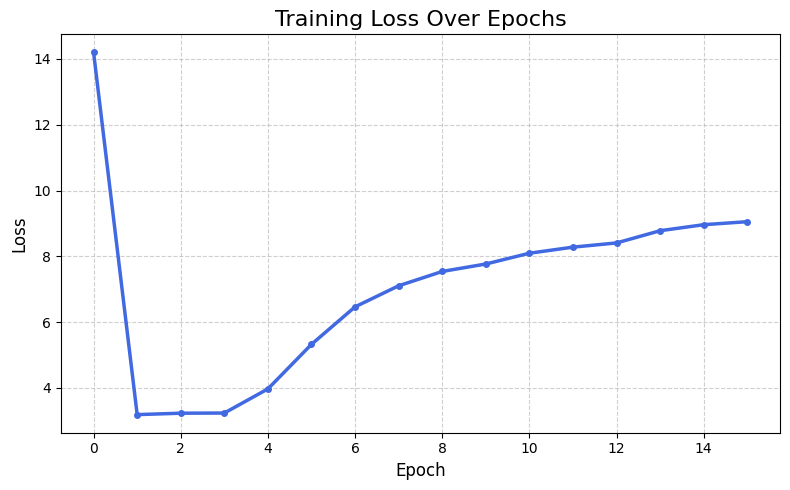

In [285]:
plt.figure(figsize=(8, 5))

plt.plot(losses, color='royalblue', linewidth=2.5, marker='o', markersize=4)  # Smooth, readable line

plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


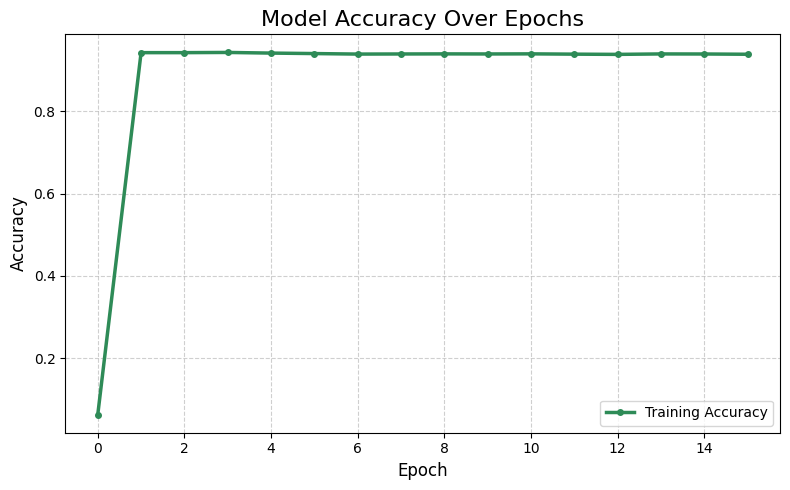

In [286]:
plt.figure(figsize=(8, 5))

plt.plot(accs, color='seagreen', linewidth=2.5, marker='o', markersize=4, label='Training Accuracy')

plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()


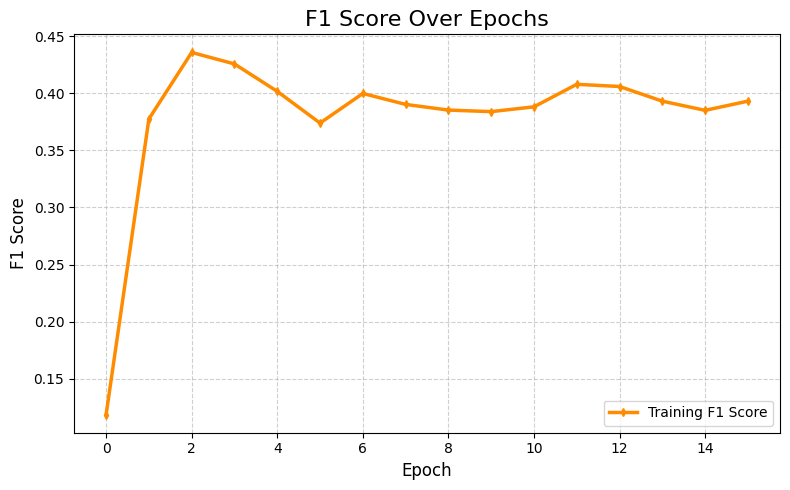

In [287]:
plt.figure(figsize=(8, 5))

plt.plot(f1s, color='darkorange', linewidth=2.5, marker='d', markersize=4, label='Training F1 Score')

plt.title('F1 Score Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()


## Make Predictions on Example Data

In [288]:
small_df = raw_df.sample(10)

In [289]:
small_df

,qid,question_text,target,char_count,word_count,question_mark
1242510,f37f2f2335ee29da1126,Does FDI promote sustainable economic growth i...,0,65,10,True
1088340,d5483726c96774599bd0,Is air conditioning needed for good health or ...,0,63,11,True
912702,b2d8c82edb61e321fb6e,What is the case for Republican control of gov...,0,107,16,True
149663,1d4430d82291d1b31a36,What is your further career plan?,0,33,6,True
748670,92ac2edfaeaa8d16cc6f,Why does bad things happen with good heart peo...,0,161,28,True
791296,9b0b1e847263d79d369a,Are particles (quantum field excitations) just...,0,70,10,True
122916,180f9c369987e92c5253,Is there a alternative to ham for a good beef ...,0,57,11,True
207658,289bdd2ccfa609678338,How many Pakistanis of post Zia generation kno...,0,120,19,True
1243422,f3ace03cc08e46ddf4ca,What is the relation between the velocity and ...,0,142,26,True
1174519,e62b16dcc758a796cb62,How many criminal justice courts (overall) are...,0,65,11,True


In [290]:
def predict_df(df):
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [291]:
# predictions
predict_df(small_df)

tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

In [292]:
# actual values
small_df.target.values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [293]:
small_df.question_text.values

array(['Does FDI promote sustainable economic growth in the host country?',
       'Is air conditioning needed for good health or for comfort only?',
       'What is the case for Republican control of government, without referencing any Democrats or their policies?',
       'What is your further career plan?',
       'Why does bad things happen with good heart people? My girlfriend left me to marry someone else. I never did anything wrong, never hurt her. Still finding reason.',
       'Are particles (quantum field excitations) just energy, like in E=mc^2?',
       'Is there a alternative to ham for a good beef wellington?',
       'How many Pakistanis of post Zia generation know that they were taught false history during their high school curriculum?',
       'What is the relation between the velocity and radius of a vessel through which a fluid flows and the frequency of sound made due to tubulence?',
       'How many criminal justice courts (overall) are there in the U.S.?'],
      

In [294]:
small_df.question_text[:10]

,question_text
1242510,Does FDI promote sustainable economic growth i...
1088340,Is air conditioning needed for good health or ...
912702,What is the case for Republican control of gov...
149663,What is your further career plan?
748670,Why does bad things happen with good heart peo...
791296,Are particles (quantum field excitations) just...
122916,Is there a alternative to ham for a good beef ...
207658,How many Pakistanis of post Zia generation kno...
1243422,What is the relation between the velocity and ...
1174519,How many criminal justice courts (overall) are...


In [295]:
small_df.iloc[9]["question_text"]


'How many criminal justice courts (overall) are there in the U.S.?'

In [296]:
small_df.iloc[4]["question_text"]

'Why does bad things happen with good heart people? My girlfriend left me to marry someone else. I never did anything wrong, never hurt her. Still finding reason.'

In [297]:
small_df.iloc[1]["question_text"]

'Is air conditioning needed for good health or for comfort only?'

In [298]:
def predict_text(text):
  df = pd.DataFrame({'question_text': [text]})
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [299]:
predict_text('what is the function of a plasma cell?')

tensor([0], dtype=torch.int32)

In [300]:
predict_text('why cant liberals realize that they are stupid??')

tensor([1], dtype=torch.int32)

In [301]:
predict_text('')

tensor([1], dtype=torch.int32)

In [302]:
predict_text('How does photosynthesis work in plants?')

tensor([0], dtype=torch.int32)

In [303]:
predict_text('Is the moon landing actually fake?')

tensor([0], dtype=torch.int32)

In [304]:
predict_text('When will people stop being so dumb about climate change?')

tensor([0], dtype=torch.int32)

In [305]:
predict_text('Why is the government hiding the truth about aliens?')

tensor([0], dtype=torch.int32)

In [306]:
predict_text('Why do conservatives always ignore facts?')

tensor([0], dtype=torch.int32)

In [307]:
predict_text('Is it possible for flat-earthers to ever use common sense?')

tensor([0], dtype=torch.int32)

In [308]:
predict_text("Why do idiots still believe in climate change?")

tensor([0], dtype=torch.int32)

In [309]:
predict_text('why cant people from west realize that they are selfish??')

tensor([1], dtype=torch.int32)

## Generate Predictions for the Test Set

In [310]:
test_inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2056617 stored elements and shape (375806, 1000)>

In [315]:
import numpy as np
import torch

def make_preds(dl):
    all_preds = []
    model.eval()
    with torch.no_grad():
        for batch in dl:
            inputs = batch[0]
            outputs = model(inputs)  # Use batch inputs here
            probs = torch.sigmoid(outputs[:, 0])
            preds = (probs > 0.5).int()
            all_preds.append(preds.cpu().numpy())  # Move to CPU if using GPU
    return np.concatenate(all_preds)


In [316]:
test_inputs.shape

(375806, 1000)

In [317]:
test_preds = make_preds(test_dl)

In [318]:
test_inputs.shape

(375806, 1000)

In [319]:
test_preds.shape

(375806,)

In [ ]:
test_preds

In [320]:
len(test_preds)

375806

In [321]:
pd.Series(test_preds).value_counts()

,count
0,360828
1,14978


In [322]:
(4144/(4144+65856))*100

5.92

In [323]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [324]:
len(sub_df)

375806

In [325]:
len(test_preds)

375806

In [327]:

sub_df.prediction = test_preds

In [330]:
sub_df.prediction.value_counts()

,count
prediction,
0,360828
1,14978


In [331]:
sub_df.to_csv('submission.csv', index = None)